In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

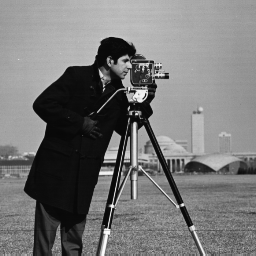

In [ ]:
image=cv2.imread("/content/cameraman.bmp",0)
cv2_imshow(image)
img=np.float32(image)

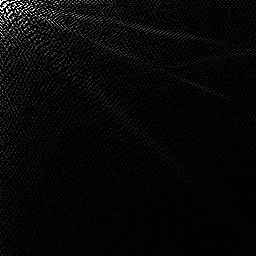

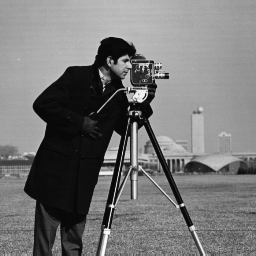

In [ ]:
dct_img=cv2.dct(img,cv2.DCT_ROWS)
idct_img=cv2.idct(dct_img)
idct_img=np.uint8(idct_img)
cv2_imshow(dct_img)
cv2_imshow(idct_img)

In [ ]:
I = np.array([154, 123, 123, 123, 123, 123, 123, 136, 192, 180, 136, 154, 154, 154, 136,
              110, 254, 198, 154, 154, 180, 154, 123, 123, 239, 180, 136, 180, 180, 166,
              123, 123, 180, 154, 136, 167, 166, 149, 136, 136, 128, 136, 123, 136, 154,
              180, 198, 154, 123, 105, 110, 149, 136, 136, 180, 166, 110, 136, 123, 123,
              123, 136, 154, 136])

M=I-128
T=np.zeros((8,8))
for i in range (8):
  for j in range (8):
    if i==0:
      T[i,j]=np.sqrt(1/8)
    else:
      T[i,j]=np.sqrt(2/8)*np.cos(((2*j)+1)*i*np.pi/16)

D=np.dot(np.dot(T,M.reshape(8,8)),T.T)
Q = np.array([16, 11, 10, 16, 24, 40, 51, 61, 12, 12, 14, 19, 26, 58, 60, 55, 14, 13, 16,
              24, 40, 57, 69, 56, 14, 17, 22, 29, 51, 87, 80, 62, 18, 22, 37, 56, 68, 109,
              103, 77, 24, 35, 55, 64, 81, 104, 113, 92, 49, 64, 78, 87, 103, 121, 120, 101,
              72, 92, 95, 98, 112, 100, 103, 99])
Q = Q.reshape((8, 8))

C=np.round(D/Q)
R=Q*C
N=np.round(np.dot(np.dot(T.T,R),T)+128)
print("matrix M ")
print(M)
print("matrix Q ")
print(Q)
print("matrix D ")
print(D)
print("matrix C ")
print(C)
print("matrix R")
print(R)
print("matrix N ")
print(N)

matrix M 
[ 26  -5  -5  -5  -5  -5  -5   8  64  52   8  26  26  26   8 -18 126  70
  26  26  52  26  -5  -5 111  52   8  52  52  38  -5  -5  52  26   8  39
  38  21   8   8   0   8  -5   8  26  52  70  26  -5 -23 -18  21   8   8
  52  38 -18   8  -5  -5  -5   8  26   8]
matrix Q 
[[ 16  11  10  16  24  40  51  61]
 [ 12  12  14  19  26  58  60  55]
 [ 14  13  16  24  40  57  69  56]
 [ 14  17  22  29  51  87  80  62]
 [ 18  22  37  56  68 109 103  77]
 [ 24  35  55  64  81 104 113  92]
 [ 49  64  78  87 103 121 120 101]
 [ 72  92  95  98 112 100 103  99]]
matrix D 
[[ 1.62250000e+02  4.05989816e+01  2.00026918e+01  7.23294009e+01
   3.02500000e+01  1.24848354e+01 -1.96505043e+01 -1.14971452e+01]
 [ 3.04792937e+01  1.08415970e+02  1.04730992e+01  3.22925175e+01
   2.76990885e+01 -1.55048925e+01  1.84075948e+01 -1.99566961e+00]
 [-9.41445075e+01 -6.00511329e+01  1.22980970e+01 -4.34188963e+01
  -3.12878702e+01  6.06690905e+00 -3.33058262e+00  7.14403453e+00]
 [-3.85675018e+01 -8.33575149